# Obtener y limpiar los datos

In [1]:
import pandas as pd
import urllib3 as url3

In [2]:
http = url3.PoolManager()

In [3]:
csv_link = "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Determinaciones.csv"

In [4]:
request = http.request("GET", csv_link)

In [5]:
request.status

200

In [6]:
dataset = (request.data).decode("utf-16").strip().split("\r")

In [7]:
columnas = dataset[0].replace('"','').split(",")

In [8]:
diccionario = {columna:[] for columna in columnas}

In [9]:
for linea in range(1, len(dataset)):
    for i in range(0, len(columnas)):
        [diccionario[columnas[i]].append(dataset[linea].strip().split(",")[i].replace('"',''))]

In [10]:
covid_df = pd.DataFrame(diccionario)

In [11]:
covid_df.head()

,fecha,provincia,codigo_indec_provincia,departamento,codigo_indec_departamento,localidad,codigo_indec_localidad,origen_de_financiamiento,tipo,ultima_actualizacion,total,positivos
0,2020-02-11,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,2,
1,2020-02-20,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,1,
2,2020-02-20,Buenos Aires,06,Bahía Blanca,056,BAHIA BLANCA,010,Privado,Privado,2020-07-08,1,
3,2020-02-27,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,4,
4,2020-02-28,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,10,


# Añadiendo datos faltantes a la columna positivos

In [12]:
covid_df['positivos'] = covid_df['positivos'].replace("",0)

In [13]:
covid_df['positivos'] = [int(i) for i in covid_df['positivos']]

In [14]:
covid_df.head()

,fecha,provincia,codigo_indec_provincia,departamento,codigo_indec_departamento,localidad,codigo_indec_localidad,origen_de_financiamiento,tipo,ultima_actualizacion,total,positivos
0,2020-02-11,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,2,0
1,2020-02-20,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,1,0
2,2020-02-20,Buenos Aires,06,Bahía Blanca,056,BAHIA BLANCA,010,Privado,Privado,2020-07-08,1,0
3,2020-02-27,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,4,0
4,2020-02-28,CABA,02,COMUNA 4,004,PARQUE PATRICIOS,010,Público,Nacional,2020-07-08,10,0


# Data Wringling

#### En este apartado vamos a obtener un dataset de cada provincia teniendo en cuenta todas sus localidades

In [15]:
lista_provincias = ["Buenos Aires", "CABA", "Catamarca", "Chaco",
                    "Chubut", "Córdoba", "Corrientes",
                    "Entre Ríos", "Formosa", "Jujuy",
                    "La Pampa", "La Rioja", "Mendoza",
                    "Misiones", "Neuquén", "Río Negro",
                    "Salta", "San Juan", "San Luis",
                    "Santa Cruz", "Santa Fe", "Santiago del Estero",
                    "Tierra del Fuego", "Tucumán"]

# Para mostrar el dataframe solo es necesario llamar al key
# df_provincias["Nombre de la provincia"]

# Si queremos saber por ejemplo las filas y columnas
# df_provincias["Nombre de la provincia"].shape

# Promedio
# df_provincias["Salta"]["positivos"].mean() <- Promedio de todos los positivos 

# Obtener un departamento en específico
# san_carlos = df_provincias["Salta"][df_provincias["Salta"]["departamento"] == "San Carlos"] 

# Suma de todos los infectados
# sum(salta_capital["positivos"].tolist())


In [18]:
df_provincias = {provincia:covid_df[covid_df["provincia"] == provincia] for provincia in lista_provincias}

### Pruebas con la provincia de Salta

In [17]:
df_provincias["Salta"]

,fecha,provincia,codigo_indec_provincia,departamento,codigo_indec_departamento,localidad,codigo_indec_localidad,origen_de_financiamiento,tipo,ultima_actualizacion,total,positivos
260,2020-03-31,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,1,0
304,2020-04-01,Salta,66,Capital,028,SALTA,050,Privado,Privado,2020-07-08,1,1
305,2020-04-01,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,8,1
353,2020-04-02,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,7,1
411,2020-04-03,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8709,2020-07-06,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,175,0
8832,2020-07-07,Salta,66,Capital,028,SALTA,050,Privado,Privado,2020-07-08,216,19
8833,2020-07-07,Salta,66,Capital,028,SALTA,050,Público,Provincial,2020-07-08,136,16
8909,2020-07-08,Salta,66,Capital,028,SALTA,050,Privado,Privado,2020-07-08,5,1


### Obtener solo el departamento "Capital"

In [30]:
salta_capital = df_provincias["Salta"][df_provincias["Salta"]["departamento"] == "Capital"] 

### Sumar la cantidad de "positivos"

In [31]:
sum(salta_capital["positivos"].tolist())

165

# Gráficos

## A modo de ejemplo se muestra como se pueden realizar gráficos

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def getBoxplot(df, columna):
    plt.boxplot(df[columna])
    plt.ylabel("Frecuencia")
    plt.title("Promedio de positivos")

def getHist(df, columna):
    plt.hist(df[columna], int(np.ceil(1+np.log2(salta_capital.shape[0]))))
    plt.xlabel("Cantidad de personas")
    plt.ylabel("Cantidad de infectados")
    plt.title("Reporte de infectados por COVID-19")

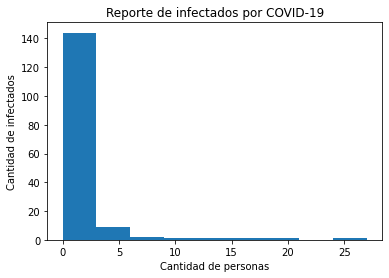

In [37]:
getHist(salta_capital, "positivos")

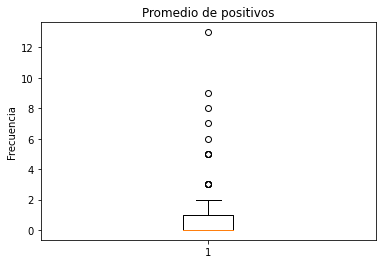

In [166]:
getBoxplot(salta_capital, "positivos")